# Supervised Learning with scikit-learn
- [Supervised Learning with scikit-learn](https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn)
- first course on the track "[Machine Learning Scientist in Python](https://app.datacamp.com/learn/career-tracks/machine-learning-scientist-with-python)"
- **Supervised Learning** - the values to be predicted are already known, goal is to predict values of previously unseen data

## Supervised Learning Basics

### Types
- **Classification** - predict the label or category of an observations (is a transaction fraudulent or not)
- **Regression** - predict continuous variables (cost of house based on size, bedrooms,...)

### Terminology
- **features** - independent variables, predictor variables, variables being input
- **target variable** - dependent variable, response variable, variable being predicted

### Data Prerequisites
- data must not have missing values
- must be numeric
- usually we store in Pandas DataFrames or NumPy arrays
- do Exploratory Data Analysis to check it out first

### scikit-learn Syntax
- [scikit-learn](https://scikit-learn.org/stable/)
- that page actually has good way to select categories like classification, regression, clustering, dimensionality reduction, model selection, preprocessing

In [20]:
# import everything
import numpy as np
import pandas as pd

from pathlib import Path

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## Example 1: k-Nearest Neighbors
- **Binary Classification** - classification where there are only two outcomes to choose between
- **k-Nearest Neighbors** - predict the label of a data point by looking at the `k` closest labeled data points
- so for `k=5`, you find the `5` closest points to your target point and give it the same label as the majority of those 
- you'd think you'd need an odd number, but they use even numbers in examples too


### The Churn Dataset
- contains data on customer accounts such as account age
- we will try to predict whether a customer will leave (the "churn") based on this data
- note: see [Datacamp Notes](../datacamp_notes.md) for instructions on getting DataFrames out of Datacamp

In [21]:
# Read in the churn dataset
churn_df = pd.read_csv(Path().cwd() / "datasets" / "churn.csv", index_col=0)
churn_df

,account_length,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,customer_service_calls,churn
0,101,45.85,17.65,9.64,1.22,3,1
1,73,22.30,9.05,9.98,2.75,2,0
2,86,24.62,17.53,11.49,3.13,4,0
3,59,34.73,21.02,9.66,3.24,1,0
4,129,27.42,18.75,10.11,2.59,1,0
...,...,...,...,...,...,...,...
3328,89,51.66,22.18,14.04,1.43,1,1
3329,141,43.96,18.87,14.69,3.02,0,0
3330,111,42.47,20.60,10.43,3.13,0,1
3331,135,46.48,13.09,11.06,3.32,1,0


### Choose Data
- features
    - choose `account_length` as it might indicate loyalty
    - choose `customer_service_calls` as it might indicate dissatisfaction
- target
    - choose `churn` since that's what we're trying to predict

In [22]:
# pull the features and target out of the larger DataFrame
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values
# create the unseen data to predict on later (each point has contains an account length and customer service calls)
X_new = np.array([[30.0, 17.5], [107.0, 24.1], [213.0, 10.9]])
print(f"feature shape: {X.shape}, target shape: {y.shape}")

feature shape: (3333, 2), target shape: (3333,)


### Fit
fit the classifier to the data

In [23]:
# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)
# Fit the classifier to the data
knn.fit(X, y)

,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Predict
use the classifier to predict the churn for unseen data

In [24]:
predictions = knn.predict(X_new)
predictions  # churn predictions for the 3 X_new data points: [0, 1, 0]

array([0, 1, 0])

### Measuring Model Performance (train-test-split)
- accuracy is one performance metric
- $\text{accuracy} = \frac{\text{correct predictions}}{\text{number of observations}}$
- need to measure how well it predicts unseen data - split into `training` and `test` sets
- train it on the `training` set (typically use `70%` for `training`)
- test its accuracy on the (unseen) `test` set (typically reserve `30%` for `testing`)

In [25]:
# split the data up into training and test sets, use 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,  # reserve 30% of the dataset for testing
    random_state=21,  # set the random seed or it will reserve different data each time
    stratify=y, # ensure that the test data has the same proportion of churn vs non-churn as the overall population
)
# fit the classifier and score how well it predicts the test data
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test) # 0.869 - not amazing

0.858

### Model Complexity (Overfitting/Underfitting)
- as you increase the `k` (number of neighbors), the model gets **less complex** (that seems backwards)
- **less complex** models can lead to **underfitting**
    - too simple to predict nuance in data
    - as `k` increases, the decision boundary is **less affected** by individual observations
    - this makes the model **less complex** and less capable of detecting relationships in the dataset
- **more complex** models can lead to **overfitting**
    - too well fit to the **training data** to generalize well to **test data**
    - vulnerable to fitting to **noise**
- here is the **decision boundary** for a variety of `k`
    - predict **target** `churn`
    - based on **features** `total_eve_charge` and `total_day_charge`
    - for a variety of `k` (**number of neighbors**)
    - as `k` increases, the boundary is less affected by individual
    - <img src="../../images/knn_churn.png" width="650">

best accuracy '0.877' occurs at '25' neighbors


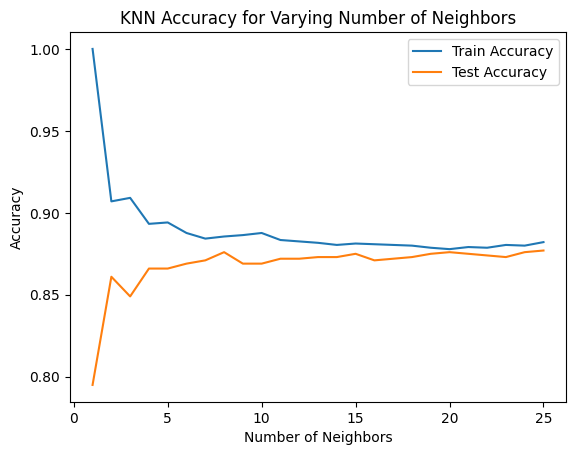

In [30]:
# plot the accuracy of the model for various numbers of neighbors
# the DataCamp videos actually used a different set of Features in the videos than the exercises
#X = churn_df[["account_length", "customer_service_calls"]].values
X = churn_df[["total_eve_charge", "total_day_charge"]].values
y = churn_df["churn"].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)
# calculate accuracy for various numbers of neighbors
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
# figure out the number of neighbors giving the highest test accuracy
best_neighbors = max(test_accuracies, key=test_accuracies.get)
max_test_accuracy = test_accuracies[best_neighbors]
print(f"best accuracy '{max_test_accuracy}' occurs at '{best_neighbors}' neighbors")
# create a plot with the accuracy for each number of neighbors
plt.plot(neighbors, train_accuracies.values(), label="Train Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Test Accuracy")
plt.title("KNN Accuracy for Varying Number of Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- as the model got more neighbors and less complex, it got better at predicting test data but worse at predicting its own training data
- it starts out overfitting, being too complex (too low k), overly good at predicting its own training data but bad at generalizing to unseen test data
- as k increased and the model got simpler, it got better at predicting unseen data before plateauing (underfitting)

### Predicting with More Features
all together now

best accuracy '0.8770614692653673' occurs at '7' neighbors


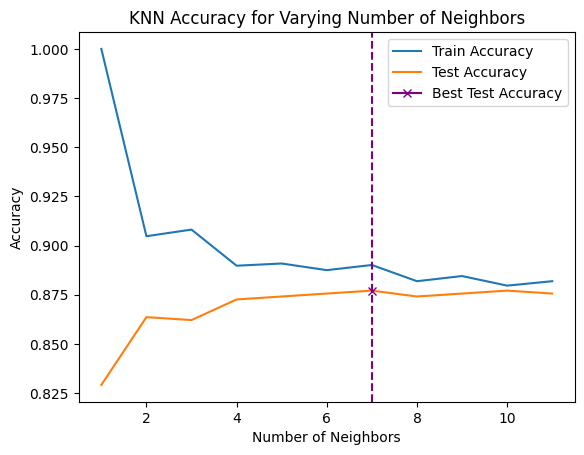

In [41]:
# this time use all of the features to predict the target
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# fit and calculate and accuracy for various numbers of neighbors
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 12)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

# figure out the number of neighbors giving the highest test accuracy
best_neighbor = max(test_accuracies, key=test_accuracies.get)
max_test_accuracy = test_accuracies[best_neighbor]
print(f"best accuracy '{max_test_accuracy}' occurs at '{best_neighbor}' neighbors")

# create a plot with the accuracy for each number of neighbors
plt.plot(neighbors, train_accuracies.values(), label="Train Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Test Accuracy")
plt.plot(best_neighbor, max_test_accuracy, color='purple', marker='x', label="Best Test Accuracy")
plt.axvline(best_neighbor, color='purple', linestyle='--')
plt.title("KNN Accuracy for Varying Number of Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()